In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir("./")

['.ipynb_checkpoints', 'Groceries_dataset.csv', 'Untitled.ipynb']

In [3]:
df = pd.read_csv("./Groceries_dataset.csv")

# KIỂM TRA THÔNG TIN

- kiểm tra số các thuộc tính và quan sát


In [4]:
df.info
# có 38765 quan sát và 3 thuộc tính: member_number, Date, itemDescription

<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

- xem 5 dòng đầu tiên

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


- kiểm tra xem có thuộc tính nào null không

In [6]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

- lọc các thông về người dùng có id là 2300 và sort theo Date

In [7]:
user_2300_info = df[df['Member_number']==2300]
user_2300_info.sort_values(by='Date')

,Member_number,Date,itemDescription
5642,2300,05-08-2015,frankfurter
21791,2300,05-08-2015,long life bakery product
9820,2300,16-03-2014,pork
25969,2300,16-03-2014,fruit/vegetable juice
2,2300,19-09-2015,pip fruit
16151,2300,19-09-2015,other vegetables
36090,2300,19-09-2015,flour
5354,2300,28-04-2015,sausage
21503,2300,28-04-2015,white wine
36538,2300,28-04-2015,hygiene articles


- lấy thông tin người dùng id là 1234 và 4321

In [8]:
df[(df['Member_number']==1234) | (df['Member_number']==4321)].sort_values(by=["Date",'Member_number'])

,Member_number,Date,itemDescription
2888,4321,08-05-2015,curd
7285,4321,08-05-2015,frankfurter
19037,4321,08-05-2015,white bread
23434,4321,08-05-2015,pip fruit
34949,4321,08-05-2015,waffles
14039,1234,12-05-2014,curd
30188,1234,12-05-2014,pastry
6174,4321,12-09-2015,sausage
22323,4321,12-09-2015,newspapers
14174,4321,13-08-2014,grapes


- kiểm tra các mặt hàng không trùng lặp

In [9]:
print(df.itemDescription.unique())
len(df.itemDescription.unique())

['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipped/sour cream' 'frozen vegetable

167

# Tiền xử lý dữ liệu

- kiểm tra các thành phần trùng lặp

In [10]:
# Có 759 giá trị trùng lặp
df[df.duplicated]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


- Kiểm tra người dùng có thực sự trùng lặp không bằng cách check lại

In [11]:
df[(df['Member_number']==2051) & (df['itemDescription']=='frankfurter')].sort_values(by='itemDescription')
"""Kết quả là có trùng lặp như đã nhận định"""

'Kết quả là có trùng lặp như đã nhận định'

In [12]:
# loại bỏ trùng lặp, giữ lại lần xuất hiện đầu tiên
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
# tách date -> thành day/month/year/
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sau đó tạo các cột ngày, tháng, năm
df.loc[:, 'day'] = df['Date'].dt.day
df.loc[:, 'month'] = df['Date'].dt.month
df.loc[:, 'year'] = df['Date'].dt.year


C:\Users\Zlick3r\AppData\Local\Temp\ipykernel_20664\3991998528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
C:\Users\Zlick3r\AppData\Local\Temp\ipykernel_20664\3991998528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'day'] = df['Date'].dt.day
C:\Users\Zlick3r\AppData\Local\Temp\ipykernel_20664\3991998528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [14]:
df

,Member_number,Date,itemDescription,day,month,year
0,1808,2015-07-21,tropical fruit,21,7,2015
1,2552,2015-01-05,whole milk,5,1,2015
2,2300,2015-09-19,pip fruit,19,9,2015
3,1187,2015-12-12,other vegetables,12,12,2015
4,3037,2015-02-01,whole milk,1,2,2015
...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,8,10,2014
38761,2022,2014-02-23,candy,23,2,2014
38762,1097,2014-04-16,cake bar,16,4,2014
38763,1510,2014-12-03,fruit/vegetable juice,3,12,2014


- chuyển tháng từ số thành chữ tiếng anh

In [18]:
month_change = {"1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"Jul","8":"Aug","9":"Sep",
               "10":"Oct","11":"Nov","12":"Dec"}
df['month'] = df['month'].astype(str).apply(lambda x: month_change.get(x, x)) 
df

C:\Users\Zlick3r\AppData\Local\Temp\ipykernel_20664\3412511720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype(str).apply(lambda x: month_change.get(x, x))


,Member_number,Date,itemDescription,day,month,year
0,1808,2015-07-21,tropical fruit,21,Jul,2015
1,2552,2015-01-05,whole milk,5,Jan,2015
2,2300,2015-09-19,pip fruit,19,Sep,2015
3,1187,2015-12-12,other vegetables,12,Dec,2015
4,3037,2015-02-01,whole milk,1,Feb,2015
...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,8,Oct,2014
38761,2022,2014-02-23,candy,23,Feb,2014
38762,1097,2014-04-16,cake bar,16,Apr,2014
38763,1510,2014-12-03,fruit/vegetable juice,3,Dec,2014


- tìm ngày trong tuần ứng với dữ liệu đã cho

In [19]:
from datetime import datetime
df['DayOfWeek'] = df['Date'].dt.day_name()
df

C:\Users\Zlick3r\AppData\Local\Temp\ipykernel_20664\4085055800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Date'].dt.day_name()


,Member_number,Date,itemDescription,day,month,year,DayOfWeek
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,5,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,1,Feb,2015,Sunday
...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,8,Oct,2014,Wednesday
38761,2022,2014-02-23,candy,23,Feb,2014,Sunday
38762,1097,2014-04-16,cake bar,16,Apr,2014,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,3,Dec,2014,Wednesday


- lấy các dữ liệu thứ 2

In [27]:
Monday_ = df[df['DayOfWeek']=="Monday"]
Monday_

,Member_number,Date,itemDescription,day,month,year,DayOfWeek
1,2552,2015-01-05,whole milk,5,Jan,2015,Monday
15,1959,2015-03-30,fruit/vegetable juice,30,Mar,2015,Monday
18,1513,2015-08-03,specialty bar,3,Aug,2015,Monday
23,1088,2015-11-30,tropical fruit,30,Nov,2015,Monday
31,3709,2015-10-26,root vegetables,26,Oct,2015,Monday
...,...,...,...,...,...,...,...
38721,2271,2014-02-03,yogurt,3,Feb,2014,Monday
38731,1808,2014-12-15,napkins,15,Dec,2014,Monday
38736,1818,2014-12-08,beverages,8,Dec,2014,Monday
38737,1176,2014-08-04,bottled water,4,Aug,2014,Monday


In [72]:
DayOfWeek = df.groupby('DayOfWeek').size()
print(DayOfWeek)
# kiểm tra số lượng mặt hàng mua trong các thứ này


day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Sắp xếp cột dayOfWeek theo thứ tự các ngày trong tuần
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)
df


DayOfWeek
Monday       5278
Tuesday      5433
Wednesday    5470
Thursday     5510
Friday       5451
Saturday     5444
Sunday       5420
dtype: int64


C:\Users\Zlick3r\AppData\Local\Temp\ipykernel_20664\2890109599.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)


,Member_number,Date,itemDescription,day,month,year,DayOfWeek
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,5,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,1,Feb,2015,Sunday
...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,8,Oct,2014,Wednesday
38761,2022,2014-02-23,candy,23,Feb,2014,Sunday
38762,1097,2014-04-16,cake bar,16,Apr,2014,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,3,Dec,2014,Wednesday


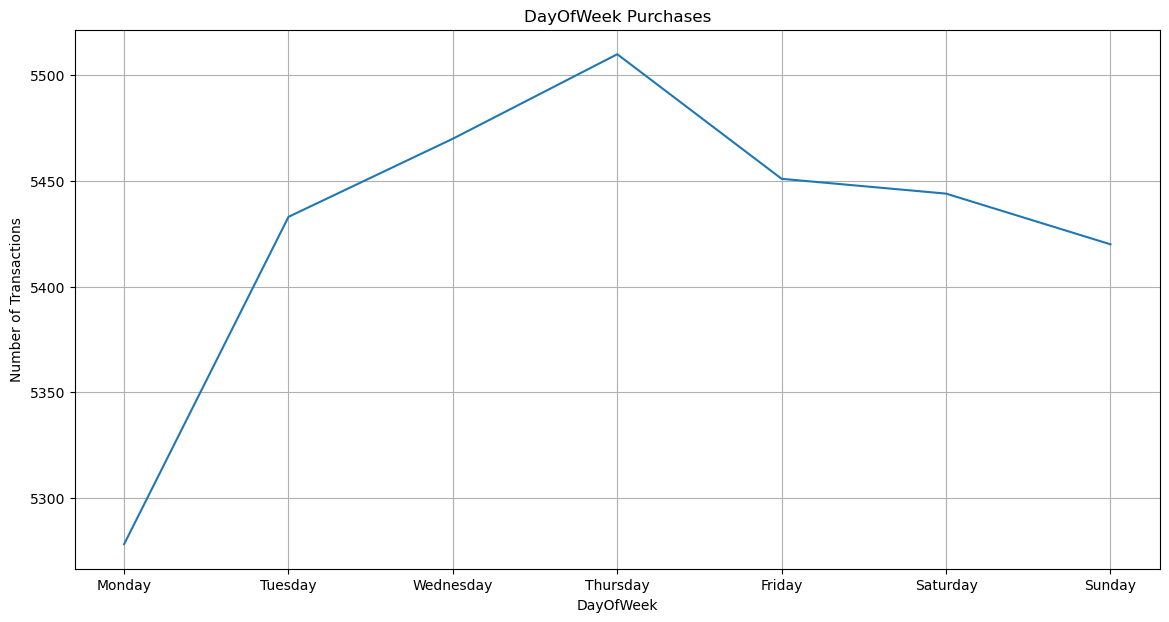

In [33]:
# Vẽ biểu đồ để đánh giá mức mua tập trung nhiều vào ngày nào

plt.figure(figsize=(14,7))
DayOfWeek.plot(kind='line')
plt.title('DayOfWeek Purchases')
plt.ylabel('Number of Transactions')
plt.xlabel('DayOfWeek')
plt.grid(True)
plt.show()


In [48]:
item_monthly_sales = df.groupby(['DayOfWeek', 'itemDescription']).size().unstack().fillna(0)
item_monthly_sales.sort_values(by='vinegar')

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Thursday,6,40,2,2,1,1,16,1,72,41,...,14,5,35,98,3,57,23,319,171,14
Monday,5,48,2,6,0,1,20,2,65,51,...,14,6,32,101,1,40,26,335,183,7
Wednesday,15,51,7,5,0,1,14,4,76,48,...,15,6,52,98,2,47,34,381,180,11
Friday,7,40,2,5,1,0,17,2,73,49,...,11,6,47,92,1,56,29,326,190,8
Tuesday,6,38,3,4,0,0,20,3,73,55,...,13,8,28,77,0,54,25,323,187,8
Saturday,8,44,3,6,1,0,16,2,72,41,...,5,10,39,87,1,60,18,346,192,7
Sunday,13,59,3,1,0,1,18,3,77,41,...,8,10,44,101,0,45,20,333,182,5


In [49]:
top_items = df['itemDescription'].value_counts().nlargest(15)
print("Top 10 mặt hàng được mua nhiều nhất:")
print(top_items)

Top 10 items sold:
itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: count, dtype: int64


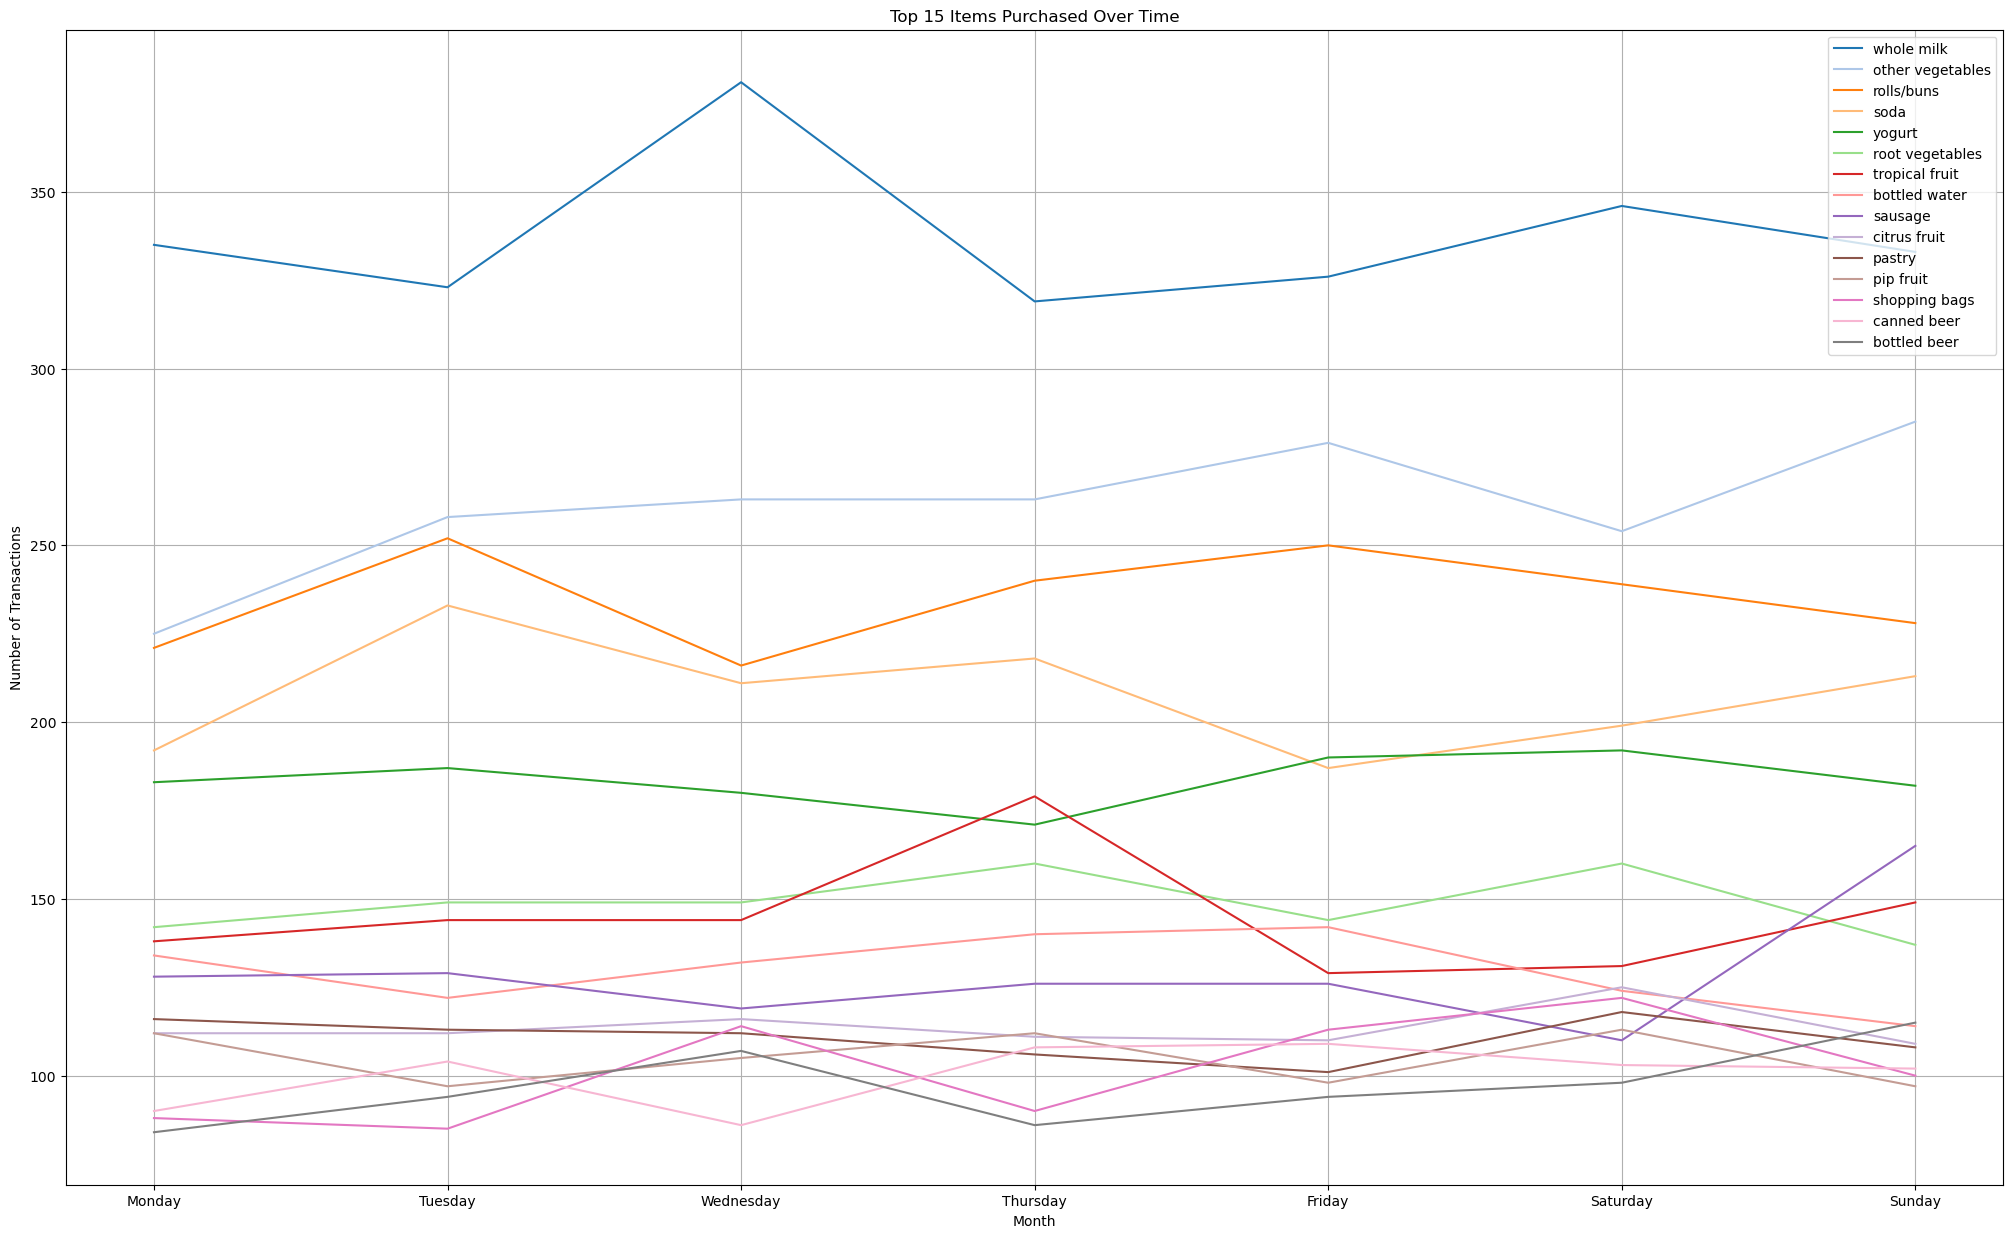

In [50]:
top_items_over_time = df[df['itemDescription'].isin(top_items.index)]

# Get the colors from the tab20 colormap
colors = plt.cm.tab20.colors

# Plotting
plt.figure(figsize=(25,15))
for idx, item in enumerate(top_items.index):
    monthly_data = top_items_over_time[top_items_over_time['itemDescription'] == item].groupby('DayOfWeek').size()
    monthly_data.plot(label=item, color=colors[idx])

plt.legend()
plt.title('Top 15 Items Purchased Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.grid(True)
plt.show()


In [62]:
df

,Member_number,Date,itemDescription,day,month,year,DayOfWeek
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,5,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,1,Feb,2015,Sunday
...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,8,Oct,2014,Wednesday
38761,2022,2014-02-23,candy,23,Feb,2014,Sunday
38762,1097,2014-04-16,cake bar,16,Apr,2014,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,3,Dec,2014,Wednesday


In [65]:
combinacoes = df.groupby(['Member_number','year']).agg({"itemDescription":list}).reset_index()

In [66]:
combinacoes

,Member_number,year,itemDescription
0,1000,2014,"[whole milk, pastry, salty snack]"
1,1000,2015,"[soda, canned beer, sausage, sausage, whole mi..."
2,1001,2014,"[sausage, whole milk, whole milk, soda, rolls/..."
3,1001,2015,"[frankfurter, frankfurter, beef, soda, curd, w..."
4,1002,2014,"[butter, frozen vegetables, whole milk, other ..."
...,...,...,...
6752,4998,2015,"[rolls/buns, curd]"
6753,4999,2014,"[other vegetables, semi-finished bread, deterg..."
6754,4999,2015,"[bottled water, butter milk, tropical fruit, b..."
6755,5000,2014,"[bottled beer, fruit/vegetable juice, other ve..."


In [67]:
combinacoes_list = combinacoes['itemDescription'].tolist()

In [68]:
from apyori import apriori

In [102]:
rules = apriori(combinacoes_list, min_support=0.02, min_confidence=0.2, min_lift=1.2, min_length=2, max_length=2)

In [103]:
results = list(rules)
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    support = [result[1]*100 for result in results]
    confidence = [result[2][0][2]*100 for result in results]
    lift = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,support,confidence,lift))
final_result = pd.DataFrame(inspect(results), columns=['Product 1','Product 2','Support(%)','Confidence(%)','lift'])
#test_ = list(final_result['Product 1'],final_result['Product 2'])
final_result['Rule'] = final_result['Product 1'] + '->' + final_result['Product 2']

In [104]:
final_result

,Product 1,Product 2,Support(%),Confidence(%),lift,Rule
0,beef,whole milk,2.708303,37.044534,1.224608,beef->whole milk
1,bottled beer,whole milk,3.522273,36.503067,1.206709,bottled beer->whole milk
2,bottled water,other vegetables,3.803463,29.574223,1.234299,bottled water->other vegetables
3,brown bread,other vegetables,2.382714,29.650092,1.237466,brown bread->other vegetables
4,curd,other vegetables,2.205121,30.101010,1.256285,curd->other vegetables
5,curd,rolls/buns,2.027527,27.676768,1.249245,curd->rolls/buns
6,frankfurter,other vegetables,2.530709,31.666667,1.321629,frankfurter->other vegetables
7,frankfurter,whole milk,3.078289,38.518519,1.273335,frankfurter->whole milk
8,frozen vegetables,whole milk,2.367915,39.024390,1.290058,frozen vegetables->whole milk
9,fruit/vegetable juice,rolls/buns,2.264318,30.784708,1.389528,fruit/vegetable juice->rolls/buns


# Trực quan dữ liệu

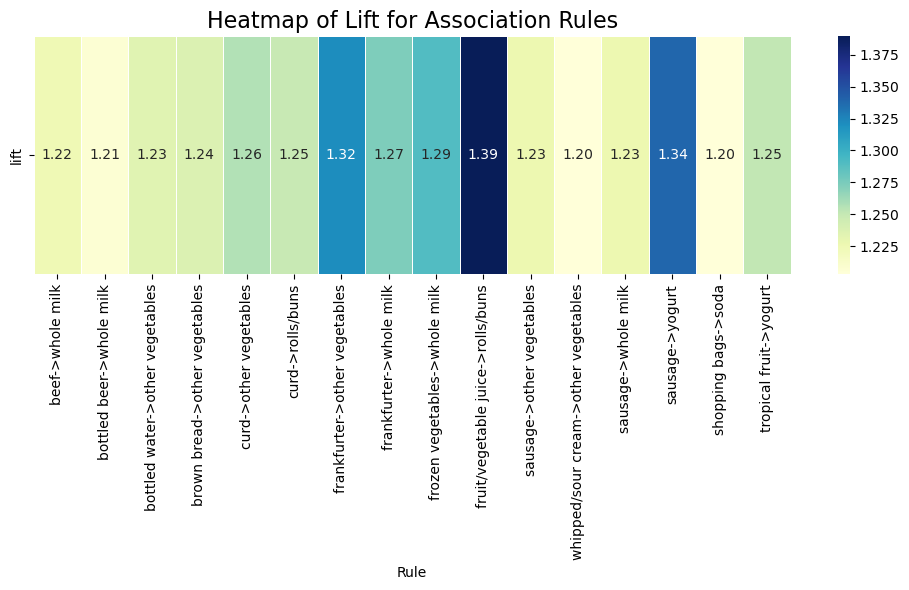

In [107]:
import seaborn as sns #final_result

heatmap_data = final_result[['Rule', 'lift']].set_index('Rule')

# Vẽ Heatmap cho Lift
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Thêm tiêu đề
plt.title('Heatmap of Lift for Association Rules', fontsize=16)

# Hiển thị
plt.tight_layout()
plt.show()
